In [1]:
import pandas as pd 
from sklearn.neighbors import KNeighborsClassifier
from ourKNN import KNN 

import numpy as np
from sklearn import datasets, model_selection
import matplotlib.pyplot as plt
%matplotlib inline  

In [4]:
def load_dataset(split):
    """Load and split the dataset into training and test parts.
    
    Parameters
    ----------
    split : float in range (0, 1)
        Fraction of the data used for training.
    
    Returns
    -------
    X_train : array, shape (N_train, 4)
        Training features.
    y_train : array, shape (N_train)
        Training labels.
    X_test : array, shape (N_test, 4)
        Test features.
    y_test : array, shape (N_test)
        Test labels.
    """
    dataset = datasets.load_iris()
    X, y = dataset['data'], dataset['target']
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=123, test_size=(1 - split))
    return X_train, X_test, y_train, y_test

In [5]:
split = 0.75
X_train, X_test, y_train, y_test = load_dataset(split)

In [6]:
knn = KNN(3)
knn.fit(X_train, y_train)

In [10]:
y_pred = knn.predict(X_test)

In [12]:
def accuracy(y_hat, y):
    total = 0
    N = len(y_hat)
    for i in range(N):
        total += (y_hat[i] == y[i])
    res = total /N 
    ## BUT BETTER THIS WAY than using simple Python
    return np.mean(y_hat == y)
    

In [13]:
accuracy(y_pred, y_test)

np.float64(0.9473684210526315)

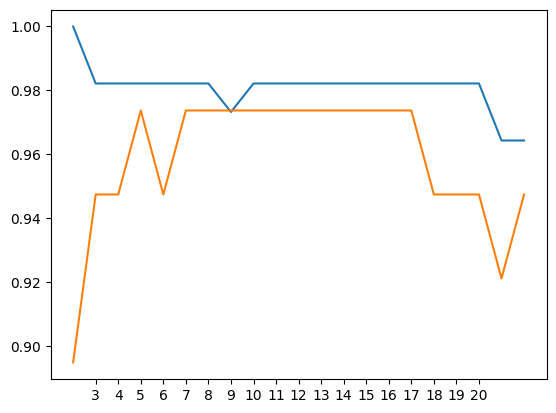

In [17]:
train_acc = []
test_acc = [] 

for k in range(2, 23):
    knn = KNN(k)
    knn.fit(X_train, y_train)
    y_train_pred = knn.predict(X_train)
    acc_train = accuracy(y_train_pred, y_train)
    y_test_pred = knn.predict(X_test)
    acc = accuracy(y_test_pred, y_test)
    
    train_acc.append(acc_train)
    test_acc.append(acc)
    
plt.plot(range(2,23), train_acc)
plt.plot(range(2,23), test_acc)
plt.xticks(range(3,21))
plt.show()